# Airline Revenue and Occupancy Optimization 

## Objective 
The goal of this project is to identify opportunities to improve seat occupancy on low-performing flights, helping the airline maximize revenue and overall profitability.


### Importing Libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

### Database Connection

In [2]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [3]:
# extracting table names from the database
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
print('List of Tables present in the Database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of Tables present in the Database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

### Data Exploration

In [5]:
aircrafts_data = pd.read_sql_query(f"""SELECT * FROM aircrafts_data""", connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [10]:
airports_data = pd.read_sql_query(f"""SELECT * FROM airports_data""", connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [11]:
boarding_passes = pd.read_sql_query(f"""SELECT * FROM boarding_passes""", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [12]:
bookings = pd.read_sql_query(f"""SELECT * FROM bookings """, connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [13]:
flights = pd.read_sql_query(f"""SELECT * FROM flights  """, connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [14]:
seats = pd.read_sql_query(f"""SELECT * FROM seats  """, connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [15]:
ticket_flights = pd.read_sql_query(f"""SELECT * FROM ticket_flights  """, connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [16]:
tickets = pd.read_sql_query(f"""SELECT * FROM tickets  """, connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [17]:
for table in table_list:
    print("\ntable: " + table)
    columns_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in columns_info.fetchall():
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

### Data Cleaning

In [19]:
# checking for missing values in each column for every table
for table in table_list:
    print(f'\nMissing Values in table {table}')
    df_table = pd.read_sql_query(f"""SELECT * FROM {table}""", connection)
    print(df_table.isnull().sum())
    


Missing Values in table aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

Missing Values in table airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Missing Values in table boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Missing Values in table bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

Missing Values in table flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Missing Values in table seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Missing Values in table ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             

### Basic Analysis 


**Number of aircraft models with seating capacity greater than 100.**


In [20]:
pd.read_sql_query(f"""SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                        GROUP BY aircraft_code 
                        HAVING num_seats > 100 
                        ORDER BY num_seats DESC""", connection)

,aircraft_code,num_seats
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


**Trend of ticket bookings over time.**


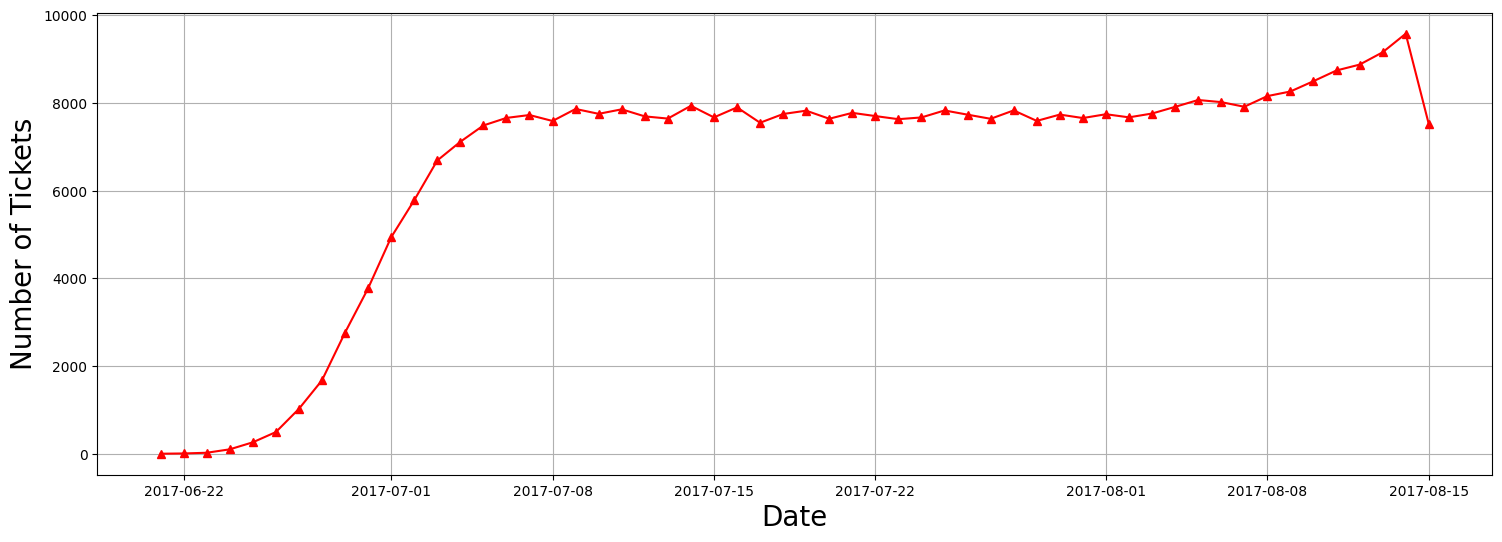

In [22]:
tickets = pd.read_sql_query(f"""SELECT *
                                    FROM tickets
                                    INNER JOIN bookings 
                                    ON tickets.book_ref=bookings.book_ref;""", connection)
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
x =  tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.plot(x.index, x['date'], marker='^', color='red')   # changed to red
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid(True)
plt.show()


**Changes in total revenue from bookings over time.**



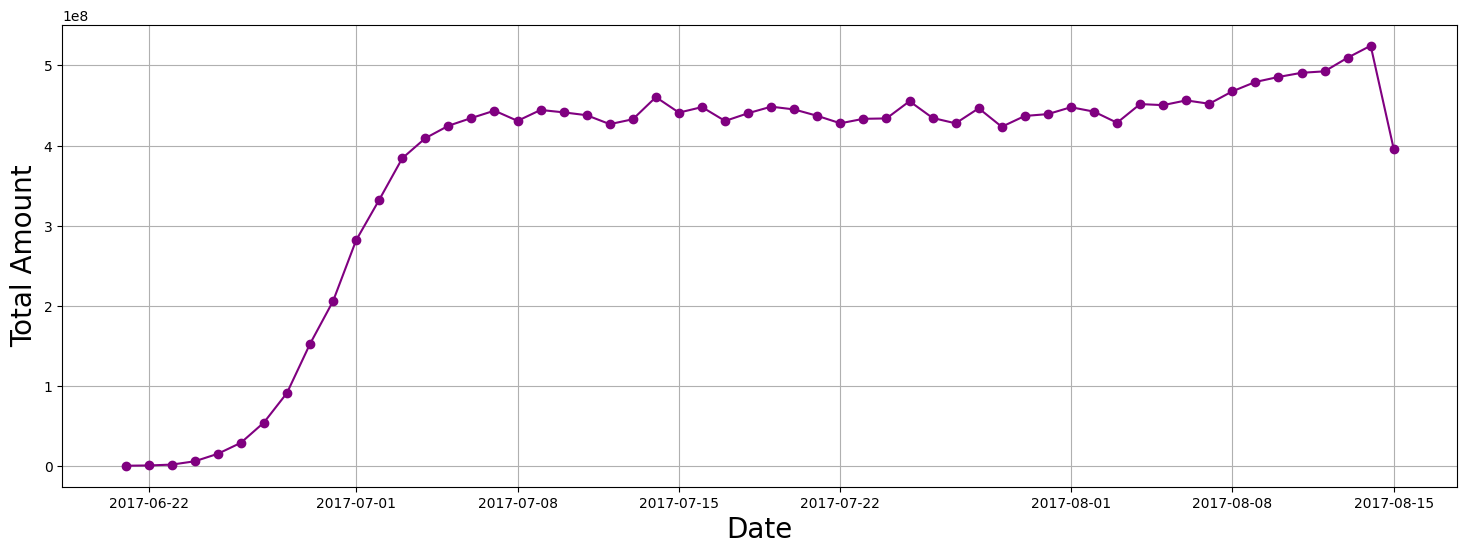

In [23]:
bookings = pd.read_sql_query(f"""SELECT * FROM bookings""", connection)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
y =  bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(18,6))
plt.plot(y.index, y['total_amount'], marker='o', color='purple')  # set line color to purple
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Amount', fontsize=20)
plt.grid(True)
plt.show()


**Average charges for each aircraft under different fare conditions.**


<Axes: xlabel='aircraft_code', ylabel='avg_amount'>

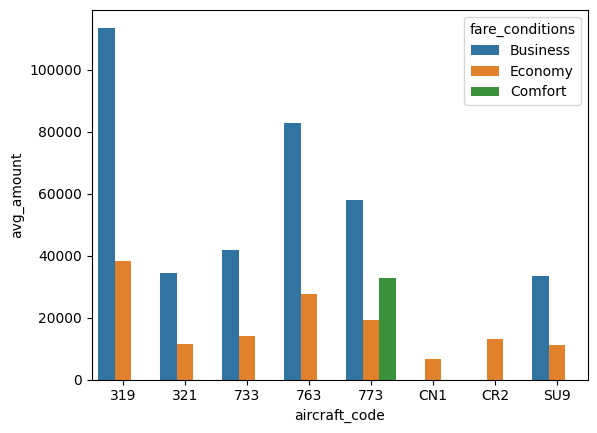

In [24]:
df = pd.read_sql_query(f"""SELECT fare_conditions, aircraft_code, AVG(amount) as avg_amount FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code, fare_conditions""", connection)

sns.barplot(data = df, x = 'aircraft_code', y ='avg_amount', hue = 'fare_conditions')

**Seasonal Booking Patterns**

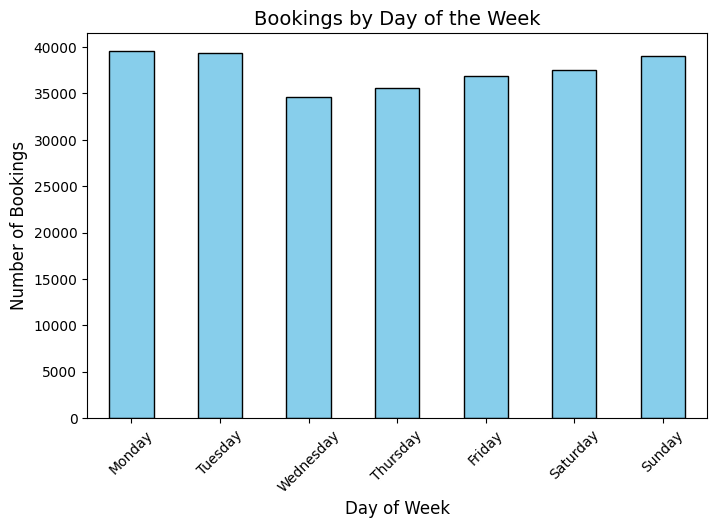

In [30]:
# Load bookings data
bookings = pd.read_sql("SELECT * FROM bookings;", connection)

# Convert to datetime
bookings['book_date'] = pd.to_datetime(bookings['book_date'])

# Extract weekday
bookings['weekday'] = bookings['book_date'].dt.day_name()

# Count bookings per weekday
weekday_bookings = bookings.groupby('weekday').size().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
weekday_bookings.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Bookings by Day of the Week", fontsize=14)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Correlation between price and occupancy**

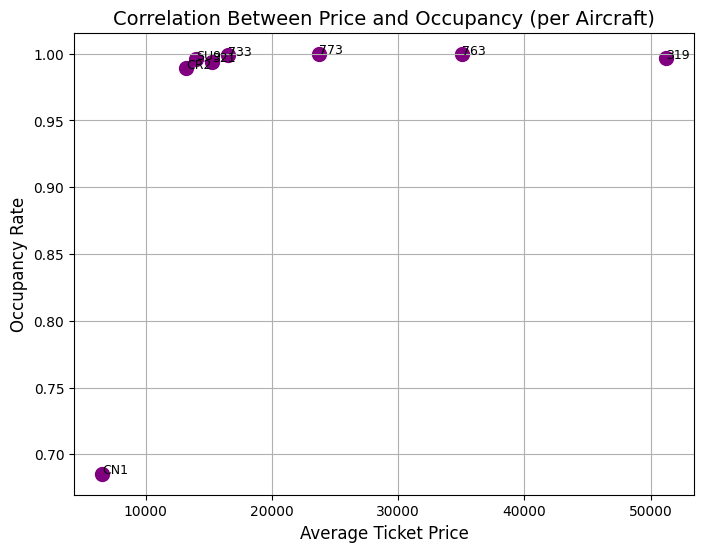

In [ ]:
# Average ticket price per aircraft
avg_price = pd.read_sql_query("""
SELECT f.aircraft_code, AVG(tf.amount) AS avg_price
FROM ticket_flights tf
JOIN flights f ON tf.flight_id = f.flight_id
GROUP BY f.aircraft_code
""", connection)

# Occupancy rate per aircraft
occupancy = pd.read_sql_query("""
SELECT f.aircraft_code, 
       SUM(CASE WHEN tf.ticket_no IS NOT NULL THEN 1 ELSE 0 END) * 1.0 / COUNT(s.seat_no) AS occupancy_rate
FROM flights f
JOIN seats s ON f.aircraft_code = s.aircraft_code
LEFT JOIN ticket_flights tf ON f.flight_id = tf.flight_id
GROUP BY f.aircraft_code
""", connection)

# Merge both datasets
price_occ = pd.merge(avg_price, occupancy, on="aircraft_code")

# Scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(price_occ["avg_price"], price_occ["occupancy_rate"], color="purple", s=100)

# Add labels for each aircraft
for i, txt in enumerate(price_occ["aircraft_code"]):
    plt.text(price_occ["avg_price"][i]+1, price_occ["occupancy_rate"][i], txt, fontsize=9)

plt.xlabel("Average Ticket Price", fontsize=12)
plt.ylabel("Occupancy Rate", fontsize=12)
plt.title("Correlation Between Price and Occupancy (per Aircraft)", fontsize=14)
plt.grid(True)
plt.show()


### Analyzing occupancy rate

**Total revenue per year and the average revenue per ticket for each aircraft.**

In [25]:
pd.set_option('display.float_format', str)

In [26]:
pd.read_sql_query(f"""SELECT aircraft_code, total_revenue, ticket_count, total_revenue/ticket_count as avg_revenue_per_ticket
                        FROM 
                        (SELECT aircraft_code, COUNT(*) as ticket_count, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code)""", connection)

,aircraft_code,total_revenue,ticket_count,avg_revenue_per_ticket
0,319,2706163100,52853,51201
1,321,1638164100,107129,15291
2,733,1426552100,86102,16568
3,763,4371277100,124774,35033
4,773,3431205500,144376,23765
5,CN1,96373800,14672,6568
6,CR2,1982760500,150122,13207
7,SU9,5114484700,365698,13985


**Average occupancy per aircraft.**

In [27]:
occupancy_rate = pd.read_sql_query(f"""SELECT a.aircraft_code, AVG(a.seats_count) as booked_seats, b.num_seats, 
AVG(a.seats_count)/b.num_seats as occupancy_rate
                            FROM (
                                SELECT aircraft_code, flights.flight_id, COUNT(*) as seats_count
                                FROM boarding_passes
                                INNER JOIN flights 
                                ON boarding_passes.flight_id=flights.flight_id
                                GROUP BY aircraft_code, flights.flight_id
                                ) as a INNER JOIN
                                (
                                SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                                GROUP BY aircraft_code  
                                ) as b
                                ON a.aircraft_code = b.aircraft_code
                            GROUP BY a.aircraft_code""", connection)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.58318098720292,116,0.46192397402761143
1,321,88.80923076923077,170,0.5224072398190045
2,733,80.25546218487395,130,0.617349709114415
3,763,113.93729372937294,222,0.5132310528350132
4,773,264.9258064516129,402,0.659019419033863
5,CN1,6.004431314623338,12,0.5003692762186115
6,CR2,21.48284690220174,50,0.42965693804403476
7,SU9,56.81211267605634,97,0.5856918832583128


**To calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.**


In [28]:
occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144


In [29]:
total_revenue = pd.read_sql_query("""SELECT aircraft_code, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code""", connection)

occupancy_rate['Inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['Inc occupancy rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999
